In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import math

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
sns.set_style("whitegrid")

In [9]:
sales = pd.read_csv(r'C:/Users/Shivam/Desktop/ml_prg/kc_house_data.csv', dtype=dtype_dict)

In [639]:
sales = pd.read_csv(r"C:/Users/Shivam/Desktop/polydata.csv")

In [1360]:
class Ridge_model:
    def __init__(self,data,target):
        self.data = data
        self.target = target
        
    def add_intercept(self):
        self.data.insert(0,'X0',1)
        return self.data
    
    def polynomial_features(self,deg):
        polynom = PolynomialFeatures(deg)
        self.data = pd.DataFrame(polynom.fit_transform(self.data))
        
        self.data.iloc[:, 1:] = (self.data.iloc[:, 1:] - np.mean(self.data.iloc[:, 1:], axis=0)) / np.std(self.data.iloc[:, 1:], axis=0)
        return self.data
    
    def predict(self,updated_theta):
        return(self.data@updated_theta)   
    
    def cost_func(self,theta_values,l2_penalty):
        m = self.data.shape[0]
        err = self.target - self.predict(theta_values)
        squared_error = np.dot(err,err)
        #squared_error = sum(list(map(lambda x: x**2,err)))
        #squared_theta = sum(list(map(lambda x: x**2,theta[1:])))
        squared_theta = np.dot(theta_values[1:],theta_values[1:])
        total_error = (1/m)*(1/2)*(squared_error) + (1/2) * l2_penalty * (squared_theta)
        return total_error
        
    def fit(self,lr,theta,l2_penalty,n_iters):
        m = self.data.shape[0]
        theta_values = theta.copy()
        parameter_values = []
        loss_list = []
        cost = self.cost_func(theta_values,l2_penalty)
        for i in range(n_iters):
            #print(theta_values)
            parameter_values.append(theta_values)
            loss_list.append(cost)
            
            #update = np.subtract((self.data @ theta_values) , self.target)
            update = ((self.data @ theta_values) - self.target)
        
            theta_values[0] = theta_values[0] - lr * (1/m) * (self.data.iloc[:,0].T @ update)
            
            theta_values[1:] = (theta_values[1:] - (lr*l2_penalty*theta_values[1:])) - lr * (1/m) * (self.data.iloc[:,1:].T @ update)
            #theta_values = theta_values -  lr * (1/m) * (self.data.T @ update)
            
            #theta_values = [theta_0,*theta_rest]
            theta_values = np.array(theta_values)
            
            cost = self.cost_func(theta_values,l2_penalty)

        parameter_values.append(theta_values)
        #loss_list.append(cost)
        return theta_values,loss_list,parameter_values
    
    

In [1361]:
sales = pd.read_csv(r"C:/Users/Shivam/Desktop/poly_data.csv")

In [1362]:
sales.head()

,Unnamed: 0,Y,X0,X1,X2,X3,X4,X5,X6,X7,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
0,0,5005.001390,1,-1.647509,-1.143075,-0.902736,-0.766620,-0.677733,-0.614161,-0.565919,...,0.122556,-0.311944,-0.109579,-0.388805,0.188887,0.079842,0.188967,-0.180929,-0.229002,0.110565
1,1,5005.037992,1,-1.474087,-1.119010,-0.899868,-0.766302,-0.677699,-0.614157,-0.565919,...,0.122556,-0.311944,-0.109579,-0.388805,0.188887,0.079842,0.188967,-0.180929,-0.229002,0.110566
2,2,5005.220731,1,-1.300665,-1.078902,-0.892086,-0.764923,-0.677467,-0.614120,-0.565913,...,0.122693,-0.311561,-0.108034,-0.384715,0.204802,0.117859,0.305906,0.153578,0.769603,-1.267898
3,3,5005.632830,1,-1.127243,-1.022751,-0.876931,-0.761210,-0.676609,-0.613929,-0.565871,...,1.148553,-0.311944,-0.109579,-0.388805,0.188887,0.079842,0.188967,-0.180929,-0.229002,0.110565
4,4,5006.154482,1,-0.953821,-0.950557,-0.851946,-0.753381,-0.674300,-0.613274,-0.565691,...,1.909801,0.365916,-0.687882,1.584816,1.251250,-0.362997,-2.081299,-1.868657,0.464766,-0.847144


In [1363]:
target = sales['Y']
data = sales.drop(['Y','Unnamed: 0'],axis=1)

sales.drop('Unnamed: 0',axis=1,inplace=True)
sales.drop('X0',axis=1,inplace=True)

target = sales['Y']
sales.drop('Y',axis=1,inplace=True)

data = sales.copy()

data = sales[['sqft_living']]
target = sales['price']

In [1364]:
#
model1 = Ridge_model(data,target)

model = Ridge_model(data,target)

In [1365]:
degree = 40

#
polynomial_data = model1.polynomial_features(degree)
polynomial_data.head()

polynomial_data = model.polynomial_features(degree)

In [1366]:
polynomial_data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,-1.647509,-1.143075,-0.902736,-0.766620,-0.677733,-0.614161,-0.565919,-0.527776,-0.496698,...,-0.284462,-0.281355,-0.278446,-0.275719,-0.273161,-0.270759,-0.268502,-0.26638,-0.264383,-0.262502
1,1.0,-1.474087,-1.119010,-0.899868,-0.766302,-0.677699,-0.614157,-0.565919,-0.527776,-0.496698,...,-0.284462,-0.281355,-0.278446,-0.275719,-0.273161,-0.270759,-0.268502,-0.26638,-0.264383,-0.262502
2,1.0,-1.300665,-1.078902,-0.892086,-0.764923,-0.677467,-0.614120,-0.565913,-0.527775,-0.496698,...,-0.284462,-0.281355,-0.278446,-0.275719,-0.273161,-0.270759,-0.268502,-0.26638,-0.264383,-0.262502
3,1.0,-1.127243,-1.022751,-0.876931,-0.761210,-0.676609,-0.613929,-0.565871,-0.527766,-0.496696,...,-0.284462,-0.281355,-0.278446,-0.275719,-0.273161,-0.270759,-0.268502,-0.26638,-0.264383,-0.262502
4,1.0,-0.953821,-0.950557,-0.851946,-0.753381,-0.674300,-0.613274,-0.565691,-0.527718,-0.496683,...,-0.284462,-0.281355,-0.278446,-0.275719,-0.273161,-0.270759,-0.268502,-0.26638,-0.264383,-0.262502


polynomial_data.shape

theta = np.random.randn(degree+1)
theta

In [1367]:
theta = np.array([1.51463105, -0.46493311,  0.13470503, -1.14286111,  0.20747718,
       -1.56262533,  0.58838208, -0.38139382, -1.02582579,  0.80452326,
        0.28971397, -1.34098277,  2.33259496,  0.38706266, -0.44586743,
        0.60773821, -0.6180272 ,  0.70783602,  0.04096997, -1.10543104,
        0.97385268, -0.53987017,  0.06474371, -1.12138576, -0.17947726,
       -1.65925294,  0.38166388, -1.82030454, -2.10370869,  0.04649342,
        0.53377165,  0.3409671 , -0.14302171, -0.1984259 , -0.06263382,
       -1.29949731,  0.3136537 , -0.06745514, -1.02625928,  0.11131948,
       -0.62836057])

In [1380]:
l2_penalty = 10.0
lr = 0.01
n_iters = 5000

In [1381]:
#
model1.cost_func(theta,l2_penalty)

12517861.658481935

model.cost_func(theta,l2_penalty)

In [1305]:
1/2*sum(list(map(lambda x: x**2,theta[1:])))

16.627539133599413

polynomial_data.iloc[:, 1:] = (polynomial_data.iloc[:, 1:] - np.mean(polynomial_data.iloc[:, 1:], axis=0)) / np.std(polynomial_data.iloc[:, 1:], axis=0)

In [1369]:
polynomial_data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,-1.647509,-1.143075,-0.902736,-0.766620,-0.677733,-0.614161,-0.565919,-0.527776,-0.496698,...,-0.284462,-0.281355,-0.278446,-0.275719,-0.273161,-0.270759,-0.268502,-0.26638,-0.264383,-0.262502
1,1.0,-1.474087,-1.119010,-0.899868,-0.766302,-0.677699,-0.614157,-0.565919,-0.527776,-0.496698,...,-0.284462,-0.281355,-0.278446,-0.275719,-0.273161,-0.270759,-0.268502,-0.26638,-0.264383,-0.262502
2,1.0,-1.300665,-1.078902,-0.892086,-0.764923,-0.677467,-0.614120,-0.565913,-0.527775,-0.496698,...,-0.284462,-0.281355,-0.278446,-0.275719,-0.273161,-0.270759,-0.268502,-0.26638,-0.264383,-0.262502
3,1.0,-1.127243,-1.022751,-0.876931,-0.761210,-0.676609,-0.613929,-0.565871,-0.527766,-0.496696,...,-0.284462,-0.281355,-0.278446,-0.275719,-0.273161,-0.270759,-0.268502,-0.26638,-0.264383,-0.262502
4,1.0,-0.953821,-0.950557,-0.851946,-0.753381,-0.674300,-0.613274,-0.565691,-0.527718,-0.496683,...,-0.284462,-0.281355,-0.278446,-0.275719,-0.273161,-0.270759,-0.268502,-0.26638,-0.264383,-0.262502


In [1445]:
l2_penalty = 3.0
lr = 0.01
n_iters = 5000

In [1446]:
#
optimal_theta,loss_list,parameter_list = model1.fit(lr,theta,l2_penalty,n_iters)

optimal_theta,loss_list,parameter_list = model.fit(lr,theta,l2_penalty,n_iters)

In [1447]:
theta

array([ 1.51463105, -0.46493311,  0.13470503, -1.14286111,  0.20747718,
       -1.56262533,  0.58838208, -0.38139382, -1.02582579,  0.80452326,
        0.28971397, -1.34098277,  2.33259496,  0.38706266, -0.44586743,
        0.60773821, -0.6180272 ,  0.70783602,  0.04096997, -1.10543104,
        0.97385268, -0.53987017,  0.06474371, -1.12138576, -0.17947726,
       -1.65925294,  0.38166388, -1.82030454, -2.10370869,  0.04649342,
        0.53377165,  0.3409671 , -0.14302171, -0.1984259 , -0.06263382,
       -1.29949731,  0.3136537 , -0.06745514, -1.02625928,  0.11131948,
       -0.62836057])

In [1448]:
optimal_theta   ## theta when lambda was more

array([ 5.00505085e+03, -4.01668174e-02, -5.08548398e-02, -5.13338990e-02,
       -4.83008624e-02, -4.43839104e-02, -4.04652014e-02, -3.68065924e-02,
       -3.34637552e-02, -3.04283135e-02, -2.76747977e-02, -2.51753755e-02,
       -2.29040004e-02, -2.08372582e-02, -1.89542873e-02, -2.24935540e-02,
        3.23756864e-02, -1.35268726e-02, -2.08031845e-02, -1.83816112e-03,
       -1.67248411e-02, -4.06854828e-02, -1.86086196e-02,  2.46453527e-03,
        3.91854441e-02, -3.10706920e-02,  2.83435502e-02,  4.09950514e-02,
        8.78444693e-03,  5.26593692e-02,  4.06259870e-02,  2.00266965e-03,
        4.06175423e-03,  3.41419725e-02, -2.94710109e-03, -2.11936697e-02,
        2.78910917e-03, -6.62459765e-03, -1.84670154e-02, -1.56110387e-02,
       -2.32557181e-02])

In [1443]:
parameter_list[-1]

array([ 5.00505085e+03, -1.42021063e-02, -1.62095628e-02, -1.64789127e-02,
       -1.61055705e-02, -1.55251358e-02, -1.48962770e-02, -1.42756185e-02,
       -1.36829155e-02, -1.31244753e-02, -1.26015751e-02, -1.21135356e-02,
       -1.16588810e-02, -1.12358050e-02, -1.08423753e-02, -2.76489328e-03,
        1.18255417e-02, -1.99701078e-03, -6.31304827e-05, -4.39236615e-04,
       -1.20549673e-03, -5.16639141e-03, -9.37984518e-03,  2.17798509e-03,
        9.21036121e-03, -5.35585092e-03,  5.56500472e-03,  6.13347437e-03,
        4.95908894e-03,  8.76882478e-03,  9.40144773e-03, -5.03889018e-04,
       -2.70010652e-03,  7.01460049e-03,  6.80864975e-04, -3.15718916e-03,
        2.97553703e-05, -7.35855684e-04, -1.68322264e-03, -3.25494841e-03,
       -6.47061163e-03])

In [1387]:
optimal_theta  ## theta when lambda was less

array([ 5.00505085e+03, -2.74780407e-02, -3.19050938e-02, -3.21300594e-02,
       -3.08792857e-02, -2.92212226e-02, -2.75257305e-02, -2.59111500e-02,
       -2.44093981e-02, -2.30237124e-02, -2.17483876e-02, -2.05753667e-02,
       -1.94963589e-02, -1.85034721e-02, -1.75893700e-02, -8.95050121e-03,
        2.19080002e-02, -6.23180249e-03, -4.79334881e-03, -7.30612901e-04,
       -5.50929196e-03, -1.50953356e-02, -1.62898919e-02,  3.52203163e-03,
        2.05841798e-02, -1.38300810e-02,  1.30416435e-02,  1.60542216e-02,
        8.18395793e-03,  2.20102308e-02,  2.01347653e-02, -1.69364715e-04,
       -3.05542749e-03,  1.68306610e-02,  3.99857341e-04, -8.21939293e-03,
        1.12903419e-03, -2.33881172e-03, -5.84381108e-03, -7.53357067e-03,
       -1.35413573e-02])

In [1449]:
#
model1.cost_func(optimal_theta,l2_penalty)

0.11852403288898476

model.cost_func(optimal_theta,l2_penalty)

pred = model.predict(polynomial_data,optimal_theta)

In [1450]:
pred = model1.predict(optimal_theta)

In [1451]:
math.sqrt(mean_squared_error(pred,target))

0.3606466899018208

pred,target

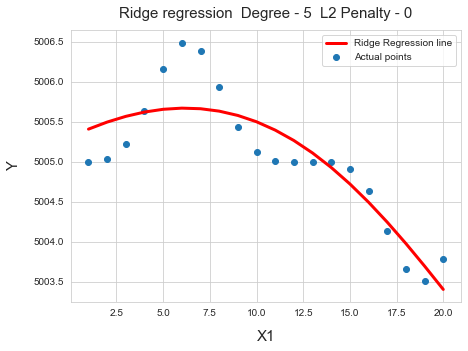

In [630]:
plt.figure(figsize=(7,5))
plt.scatter(data,target,label='Actual points')
plt.plot(data,pred,c='r',linewidth=3,label='Ridge Regression line')
plt.xlabel("X1",fontsize=15,labelpad=12)
plt.ylabel("Y",fontsize=15,labelpad=12)

plt.title("Ridge regression  Degree - {}  L2 Penalty - {}".format(degree,l2_penalty),fontsize=15,pad=12)
plt.legend()
plt.show()

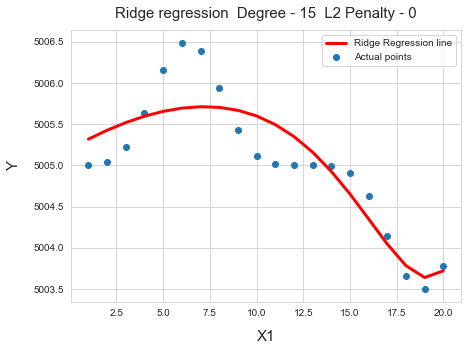

In [664]:
plt.figure(figsize=(7,5))
plt.scatter(data,target,label='Actual points')
plt.plot(data,pred,c='r',linewidth=3,label='Ridge Regression line')
plt.xlabel("X1",fontsize=15,labelpad=12)
plt.ylabel("Y",fontsize=15,labelpad=12)

plt.title("Ridge regression  Degree - {}  L2 Penalty - {}".format(degree,l2_penalty),fontsize=15,pad=12)
plt.legend()
plt.show()

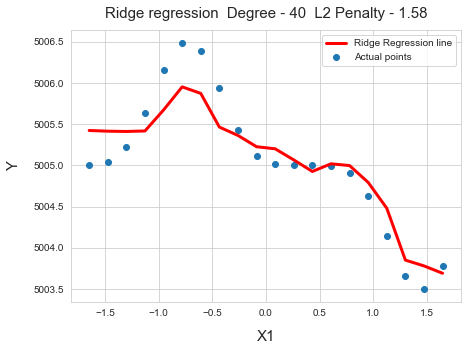

In [1421]:
plt.figure(figsize=(7,5))
plt.scatter(polynomial_data.iloc[:,1],target,label='Actual points')
plt.plot(polynomial_data.iloc[:,1],pred,c='r',linewidth=3,label='Ridge Regression line')
plt.xlabel("X1",fontsize=15,labelpad=12)
plt.ylabel("Y",fontsize=15,labelpad=12)

plt.title("Ridge regression  Degree - {}  L2 Penalty - {}".format(degree,l2_penalty),fontsize=15,pad=12)
plt.legend()
plt.show()

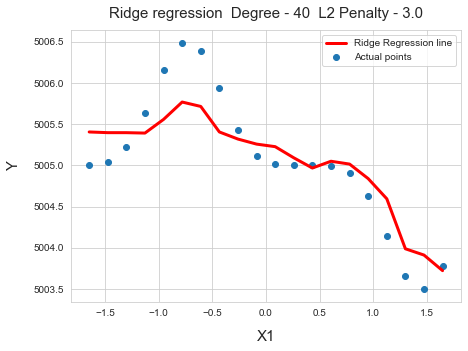

In [1453]:
plt.figure(figsize=(7,5))
plt.scatter(polynomial_data.iloc[:,1],target,label='Actual points')
plt.plot(polynomial_data.iloc[:,1],pred,c='r',linewidth=3,label='Ridge Regression line')
plt.xlabel("X1",fontsize=15,labelpad=12)
plt.ylabel("Y",fontsize=15,labelpad=12)

plt.title("Ridge regression  Degree - {}  L2 Penalty - {}".format(degree,l2_penalty),fontsize=15,pad=12)
plt.legend()
plt.show()

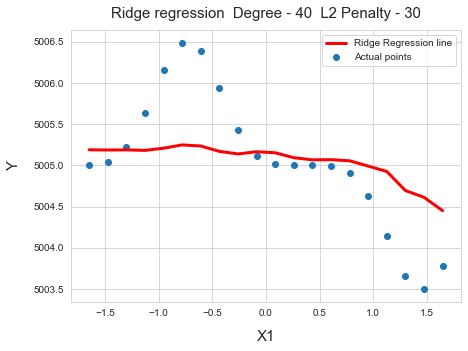

In [1439]:
plt.figure(figsize=(7,5))
plt.scatter(polynomial_data.iloc[:,1],target,label='Actual points')
plt.plot(polynomial_data.iloc[:,1],pred,c='r',linewidth=3,label='Ridge Regression line')
plt.xlabel("X1",fontsize=15,labelpad=12)
plt.ylabel("Y",fontsize=15,labelpad=12)

plt.title("Ridge regression  Degree - {}  L2 Penalty - {}".format(degree,l2_penalty),fontsize=15,pad=12)
plt.legend()
plt.show()

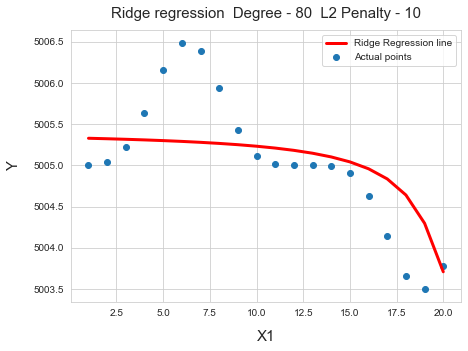

In [741]:
plt.figure(figsize=(7,5))
plt.scatter(data,target,label='Actual points')
plt.plot(data,pred,c='r',linewidth=3,label='Ridge Regression line')
plt.xlabel("X1",fontsize=15,labelpad=12)
plt.ylabel("Y",fontsize=15,labelpad=12)

plt.title("Ridge regression  Degree - {}  L2 Penalty - {}".format(degree,l2_penalty),fontsize=15,pad=12)
plt.legend()
plt.show()

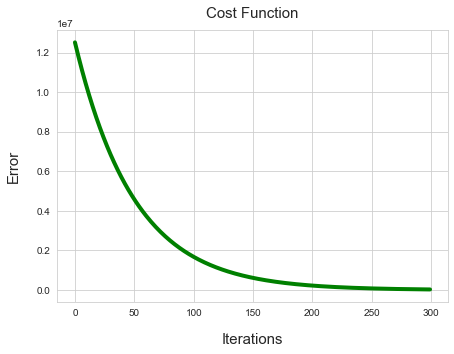

In [1475]:
plt.figure(figsize=(7,5))
plt.plot(range(len(loss_list))[:300],loss_list[:300],linewidth=4,c='g')
plt.xlabel('Iterations',fontsize=15,labelpad=15)
plt.ylabel('Error',fontsize=15,labelpad=15)
plt.title("Cost Function",fontsize=15,pad=12)
plt.show()

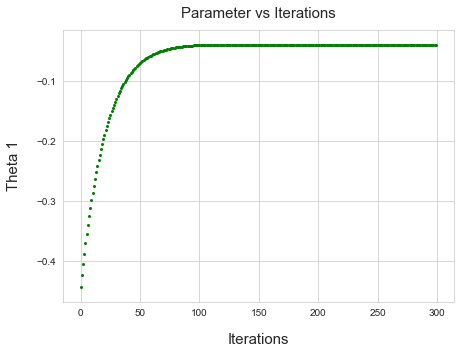

In [1472]:
plt.figure(figsize=(7,5))
plt.scatter(range(len(parameter_list))[:300],list(zip(*parameter_list))[1][:300],c='g',s=4)
plt.xlabel('Iterations',fontsize=15,labelpad=15)
plt.ylabel('Theta 1',fontsize=15,labelpad=15)
plt.title("Parameter vs Iterations",fontsize=15,pad=12)
plt.show()

In [1474]:
loss_list[0],loss_list[-1]

(12517745.265708, 0.11852403288900652)

print(list(zip(*parameter_list))[1])

parameter_list